# Fraud Detection

## Task

Build a logistic regression model using Scikit-learn to predict fraudulent transactions by training it on [Credit Card Fraud Detection](https://www.kaggle.com/c/ieee-fraud-detection/data) dataset from Kaggle. Before you train the model, create at least 1 visualization of the data.

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Scaling by standardisation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

## Explore the Dataset / Visualize

In [82]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,127695.0,-1.180302,0.997052,-1.141980,1.122934,0.870430,0.496341,2.626909,-0.275357,-1.251222,...,-0.116098,-0.213810,-0.495616,-0.008486,1.185834,-0.207036,0.126568,-0.016534,362.00,0
1,74522.0,-0.491090,0.736967,1.121518,1.855768,2.192105,4.720293,-0.499471,1.195404,-1.064379,...,0.093564,0.267335,-0.344519,1.041548,0.398812,0.448862,0.111847,0.087620,18.15,0
2,141751.0,-1.081088,-0.891385,1.263885,-0.395564,1.579365,-1.016444,-0.654525,0.249166,0.485191,...,-0.003331,-0.447941,0.267298,0.545437,-0.103051,-0.631727,-0.021950,0.028339,1.18,0
3,131485.0,2.057686,-0.038430,-1.058048,0.417849,-0.127807,-1.212282,0.204981,-0.350565,0.502264,...,-0.284453,-0.677820,0.336365,0.053365,-0.291787,0.194302,-0.069472,-0.058925,3.96,0
4,38305.0,0.658722,-2.234003,1.721964,0.101310,-2.625252,0.696838,-1.609055,0.428602,0.870870,...,0.496141,1.149756,-0.402166,0.628406,0.346473,0.039347,0.042984,0.071146,298.00,0


#### Check if Any Missing Values in the Dataset

In [83]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values were detected.

In [84]:
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0]
print(f'Number of non-fraudulent operations: {len(non_fraud)}')
print(f'Number of fraudulent operations: {len(fraud)}')
print(f"The average amount of fradulent transactions is {fraud['Amount'].mean()}")
print(f"The maximum amount of fradulent transactions is {fraud['Amount'].max()}") 

Number of non-fraudulent operations: 284315
Number of fraudulent operations: 492
The average amount of fradulent transactions is 122.21132113821143
The maximum amount of fradulent transactions is 2125.87


## Visualize the Dataset

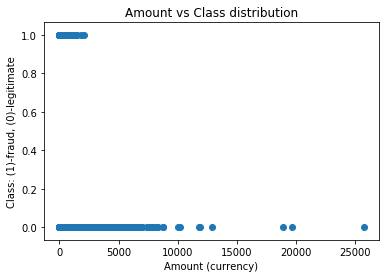

In [85]:
# Plot the Amount vs Class distribution
plt.scatter(df['Amount'],df['Class'])
plt.title('Amount vs Class distribution')
plt.xlabel('Amount (currency)')
plt.ylabel('Class: (1)-fraud, (0)-legitimate')
plt.show()

## Decide Which Features Are Important

In this analysis we will not use the "Time" feature. Our matrix "X" of independent variables will consist of the features "V1" through "V28" and also include the "Amount" feature. The dependent variable vector "y" will consist the values of the "Class" column of the dataset.

In [86]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

## Spliting the dataset into the Training set (85%) and Test set (15%)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

## Feature Scaling

In [88]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) # Need to fit the object into our feature set, then transform feature set
X_test = sc_X.transform(X_test) # Only need to transform, because the object is already fitted (prev. line), otherwise different scales.

## Perform Machine Learning

In [89]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)  # using the same random_state
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Test the Model On the Testing Set

In [90]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

#### Evaluate Performance of the Model

In [91]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[42642     5]
 [   25    50]]


In [92]:
print(f'Number of correct predictions: {cm[0,0] + cm[1,1]}')
print(f'Number of incorrect predictions: {cm[0,1] + cm[1,0]}')

Number of correct predictions: 42692
Number of incorrect predictions: 30


Very good!
The performance score of the model on the Test Set:

In [93]:
print(classifier.score(X_test,y_test))

0.9992977856841908


But if we remember the main purpose of this model - to detect fradulent credit card transactions, we should rather be interested in how well the model can detect fradulent transactions specifically. For that we will use the __recall score__ - the ability of the classifier to find all the positive (fradulent) samples: 

In [94]:
print(recall_score(y_test, y_pred))

0.6666666666666666


This is not a bad number, but in order for the model to be used in production the __recall score__ must be significally improved.

Finally the full Classification Report with other performance scores of the model

In [95]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.91      0.67      0.77        75

    accuracy                           1.00     42722
   macro avg       0.95      0.83      0.88     42722
weighted avg       1.00      1.00      1.00     42722

